In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support
)
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


In [96]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [98]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [99]:
print("Null values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicates: 240


In [100]:
df.drop_duplicates(inplace=True)

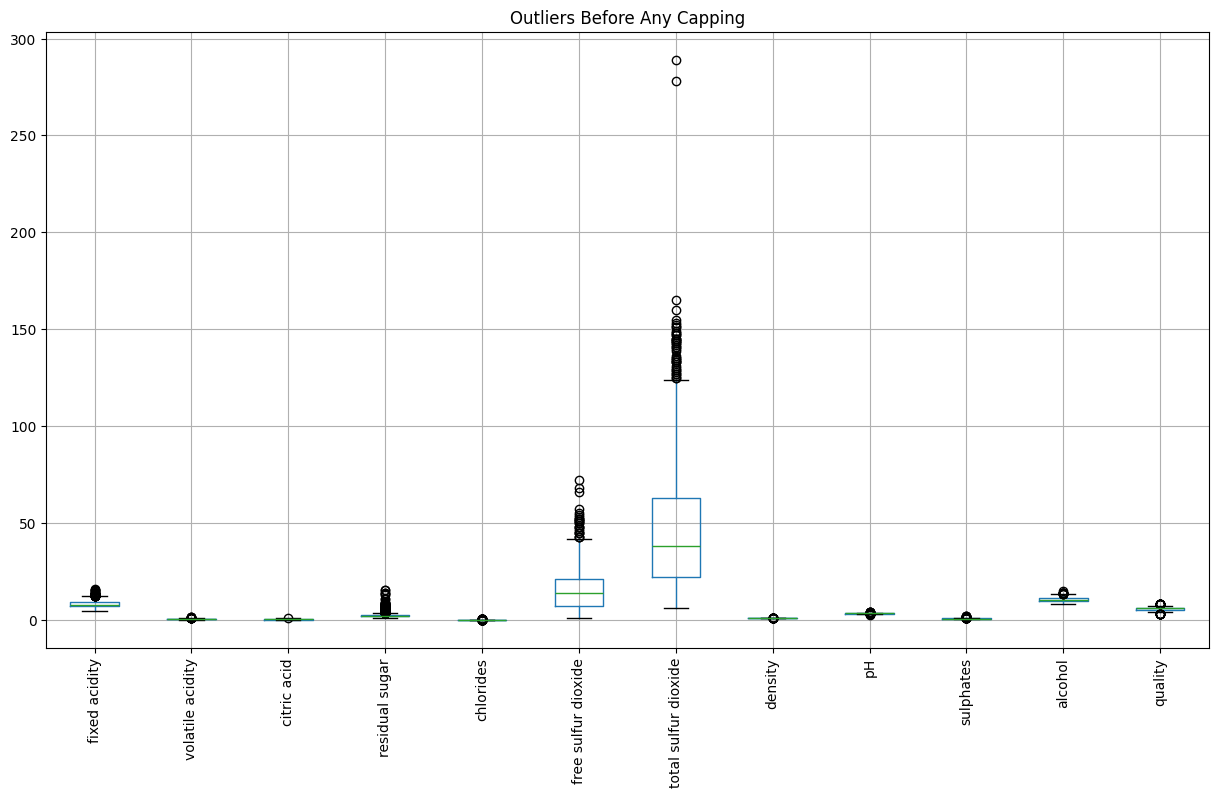

In [101]:
#Visualize Outliers (Before Capping)
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Outliers Before Any Capping")
plt.grid(True)
plt.show()


In [102]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64'] and col != 'quality':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound,
                                      np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col]))
    return df_capped

df_capped = cap_outliers_iqr(df)
df_capped.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.284069,0.527840,0.272288,2.324099,0.081323,15.714496,46.092715,0.996707,3.308889,0.649963,10.428734,5.623252
std,1.658319,0.177262,0.195379,0.607558,0.018486,9.852641,30.877994,0.001798,0.149982,0.137403,1.070647,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.038500,1.000000,6.000000,0.992270,2.925000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.940000,3.650000,0.122500,42.000000,124.500000,1.001150,3.685000,1.000000,13.500000,8.000000


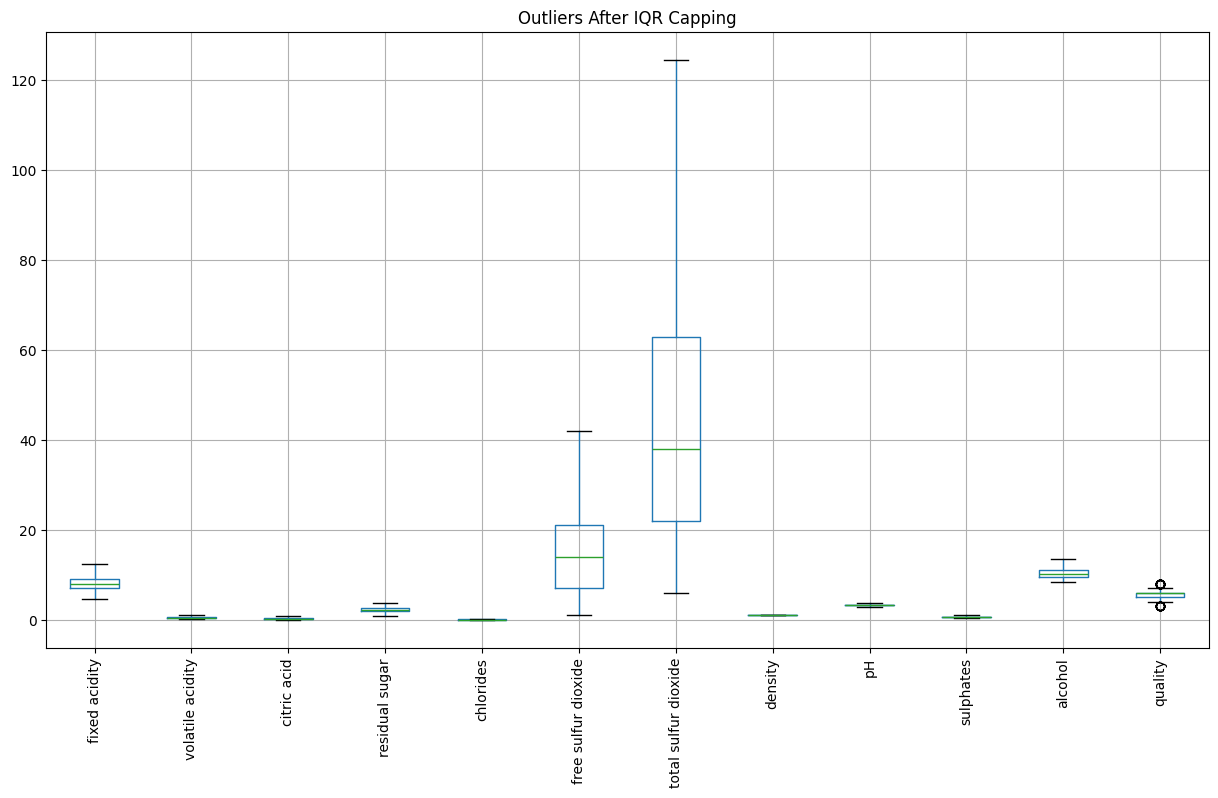

In [103]:
#Visualize Outliers After Capping
plt.figure(figsize=(15, 8))
df_capped.boxplot(rot=90)
plt.title("Outliers After IQR Capping")
plt.grid(True)
plt.show()

In [104]:
# Features and Labels
X = df_capped.drop("quality", axis=1)
y = df_capped["quality"].apply(lambda q: "Good" if q >= 6 else "Bad")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




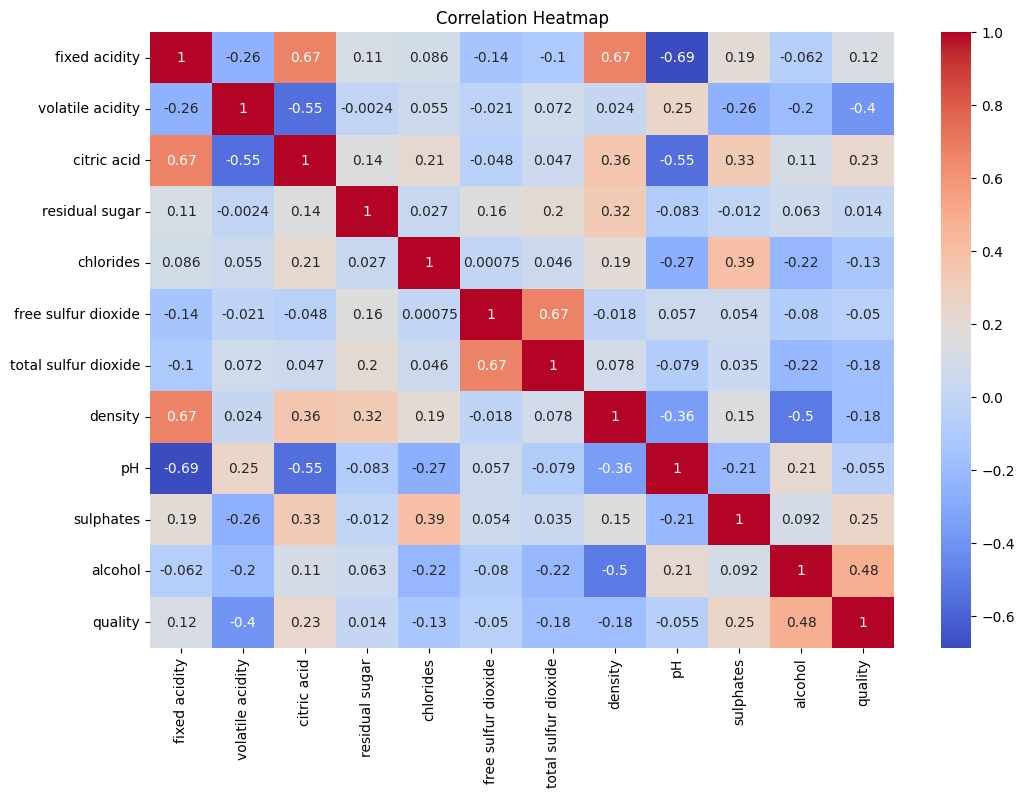

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1087, 11)
Test size: (272, 11)


In [107]:
# Logistic Regression
model = LogisticRegression(max_iter=1000, penalty='l2', C=10)
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000)

In [108]:
# Accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.7507
Test Accuracy: 0.7610


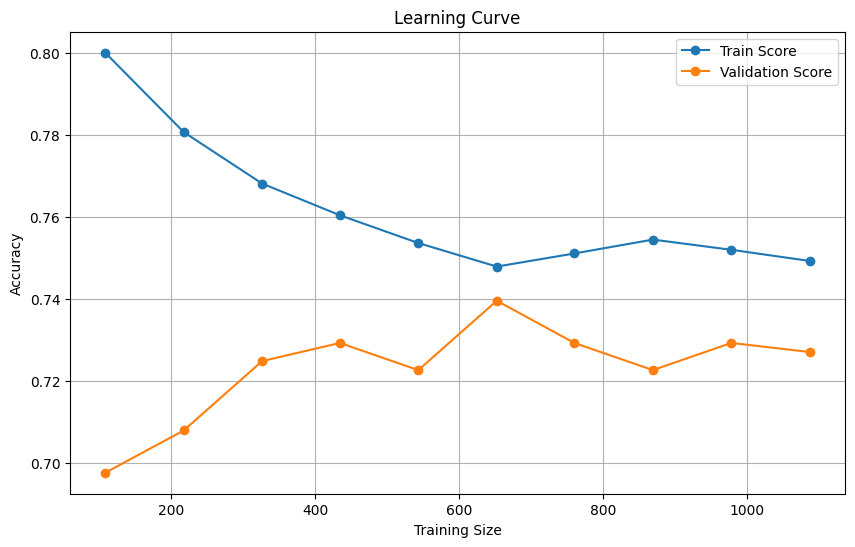

In [109]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train Score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Score")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

         Bad       0.79      0.71      0.75       135
        Good       0.74      0.81      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



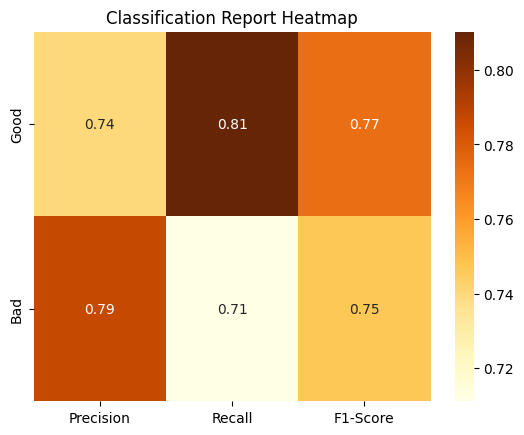

In [110]:
# Classification Report Heatmap
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=["Good", "Bad"])

report_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=["Good", "Bad"])

sns.heatmap(report_df, annot=True, cmap='YlOrBr')
plt.title("Classification Report Heatmap")
plt.show()


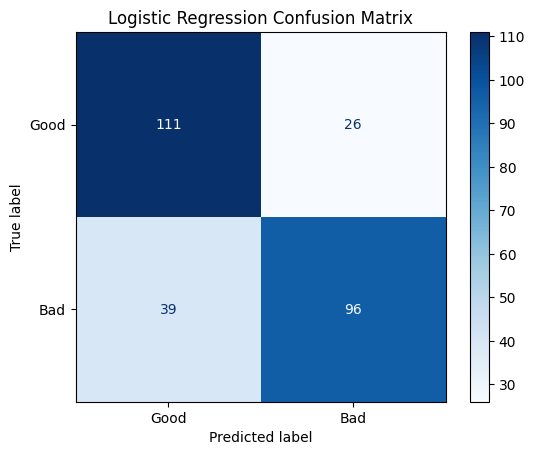

In [111]:
cm = confusion_matrix(y_test, y_pred, labels=["Good", "Bad"])
ConfusionMatrixDisplay(cm, display_labels=["Good", "Bad"]).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)
plt.show()

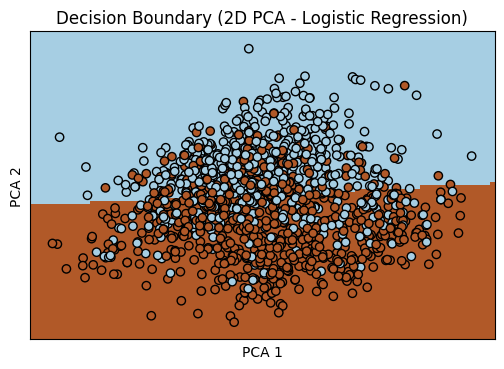

In [112]:
# PCA + Logistic Regression Decision Boundary
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

logreg_2d = LogisticRegression()
logreg_2d.fit(X_2d, y)

_, ax = plt.subplots(figsize=(6, 4))
DecisionBoundaryDisplay.from_estimator(
    logreg_2d,
    X_2d,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="PCA 1",
    ylabel="PCA 2",
    eps=0.5,
)

ax.scatter(X_2d[:, 0], X_2d[:, 1], c=pd.Categorical(y).codes, edgecolors="k", cmap=plt.cm.Paired)
plt.title("Decision Boundary (2D PCA - Logistic Regression)")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


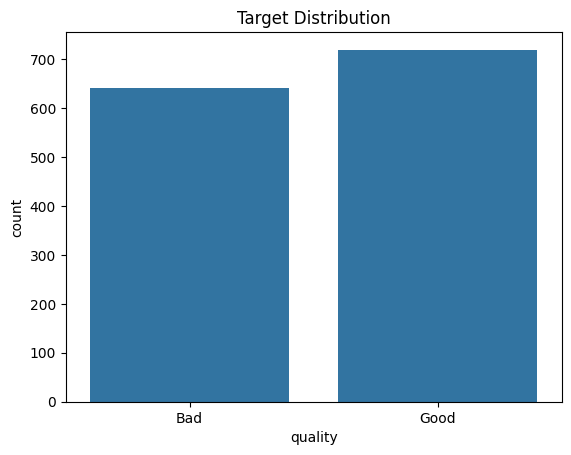

In [113]:
sns.countplot(x=y)
plt.title("Target Distribution")
plt.show()

In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV



In [115]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [116]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_svm.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_svm.predict(X_test)))


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Train Accuracy: 0.8068077276908924
Test Accuracy: 0.7794117647058824


In [117]:
manual_svm = SVC(C=1, kernel='rbf', gamma=0.1)
manual_svm.fit(X_train, y_train)

y_pred_svm = manual_svm.predict(X_test)
print("SVM Train Accuracy:", accuracy_score(y_train, manual_svm.predict(X_train)))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Train Accuracy: 0.8068077276908924
SVM Test Accuracy: 0.7794117647058824



Classification Report:
               precision    recall  f1-score   support

         Bad       0.80      0.74      0.77       135
        Good       0.76      0.82      0.79       137

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272



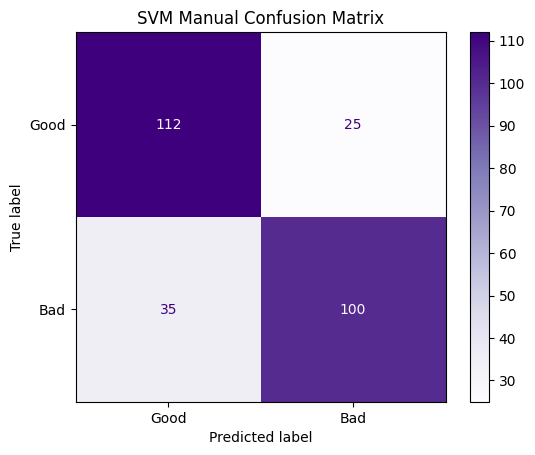

In [118]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=["Good", "Bad"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Good", "Bad"])
disp.plot(cmap='Purples')
plt.title("SVM Manual Confusion Matrix")
plt.show()

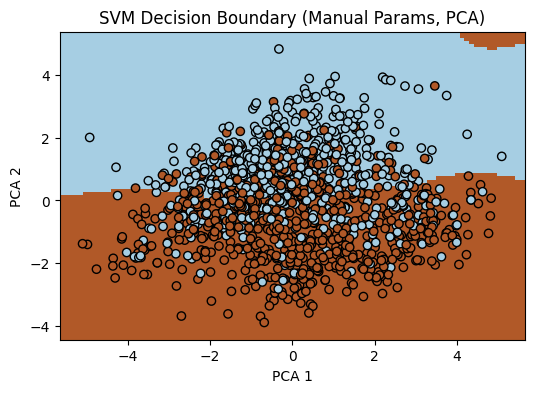

In [119]:
# PCA + SVM Decision Boundary
X_pca = pca.fit_transform(X_scaled)

svm_2d = SVC(kernel='rbf', C=10, gamma='scale')
svm_2d.fit(X_pca, y)

_, ax = plt.subplots(figsize=(6, 4))
DecisionBoundaryDisplay.from_estimator(
    svm_2d,
    X_pca,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="PCA 1",
    ylabel="PCA 2",
    eps=0.5,
)

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.Categorical(y).codes, edgecolors="k", cmap=plt.cm.Paired)
plt.title("SVM Decision Boundary (Manual Params, PCA)")
plt.show()